In [2]:
import pandas as pd

# define dataset
dataset = pd.read_csv('NBA_data_merged_imputed_v2.csv')

dataset = dataset.drop(columns=['tm', 'player'])

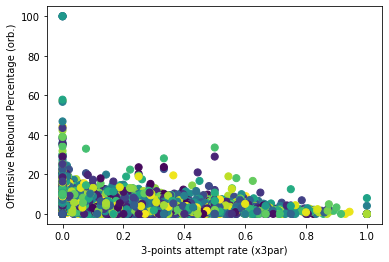

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 8582

colors = np.random.rand(N)

plt.scatter(x = dataset['x3par'], y=dataset['orb.'], s=50, c=colors)
plt.xlabel('3-points attempt rate (x3par)')
plt.ylabel('Offensive Rebound Percentage (orb.)')
plt.show()

In [68]:
dataset['vorp.gm'].describe()

count    8582.000000
mean        0.516558
std         1.704113
min        -7.400000
25%        -0.500000
50%         0.100000
75%         1.200000
max        12.600000
Name: vorp.gm, dtype: float64

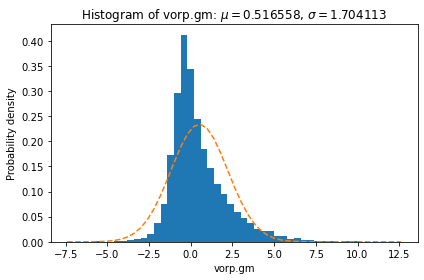

In [70]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 0.516558  # mean of distribution
sigma = 1.704113  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(dataset['vorp.gm'], num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('vorp.gm')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of vorp.gm: $\mu=0.516558$, $\sigma=1.704113$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

year
age
g
per
ts.
x3par
ftr
orb.
drb.
trb.
ast.
stl.
blk.
tov.
usg.
ws
ws.48
obpm
dbpm
bpm
vorp.gm
offense
defense
mpg.1
tm.ortg
tm.drtg
truesalary
bbref.pos


C:\Users\marti\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


yrs.experience
height
weight
rounded.position
Selected


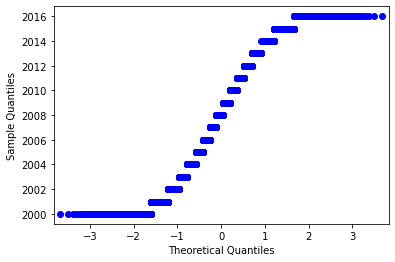

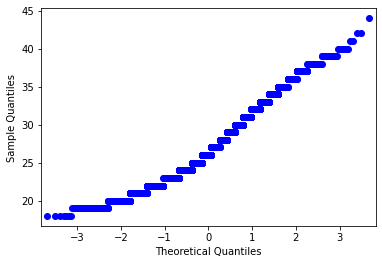

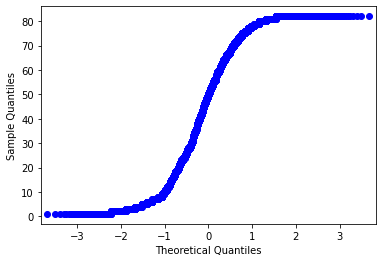

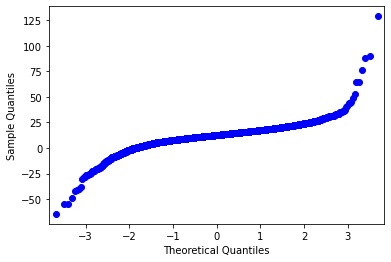

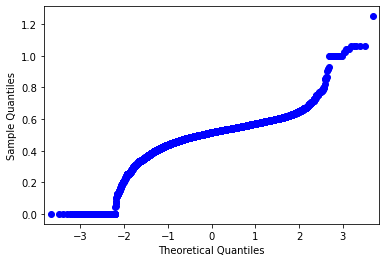

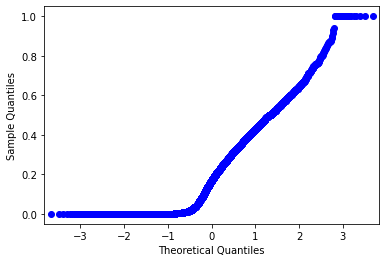

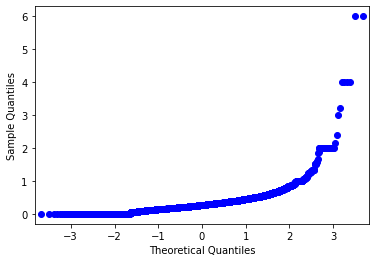

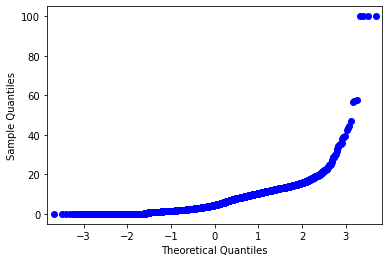

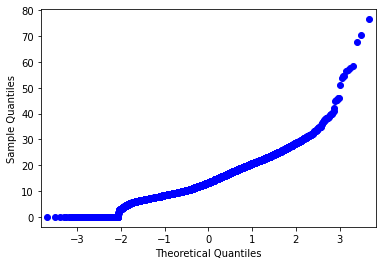

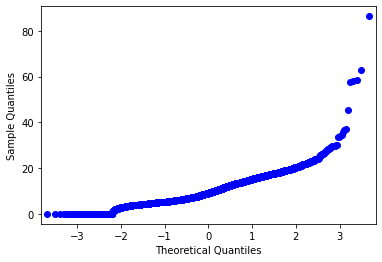

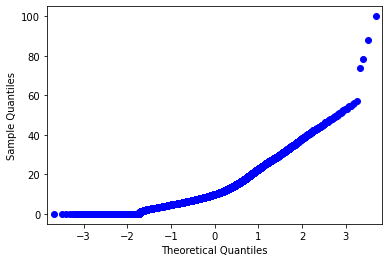

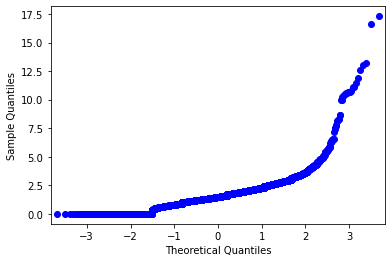

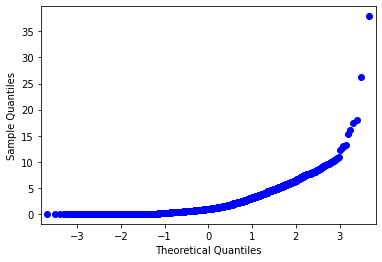

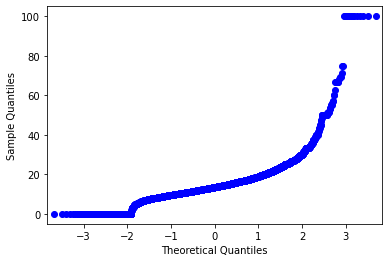

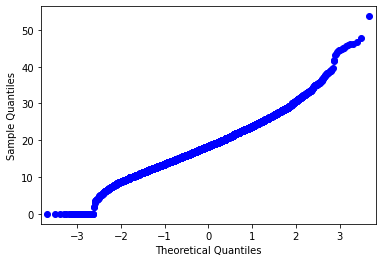

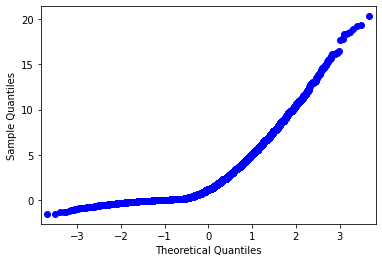

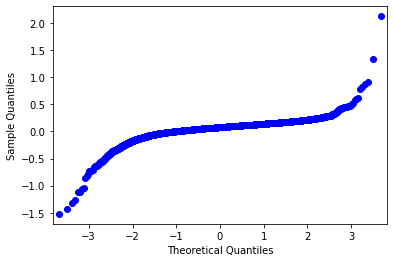

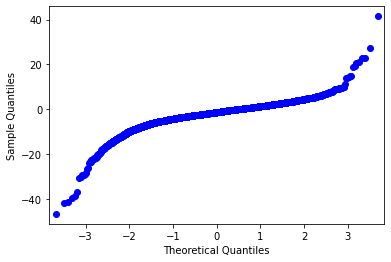

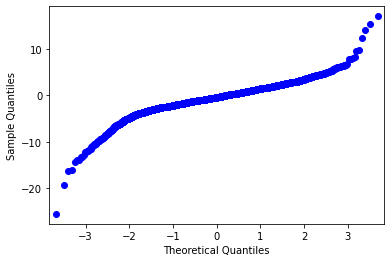

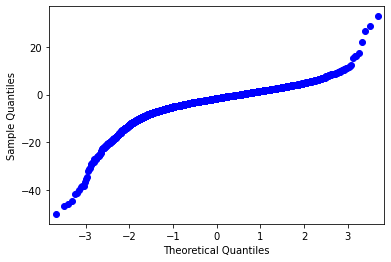

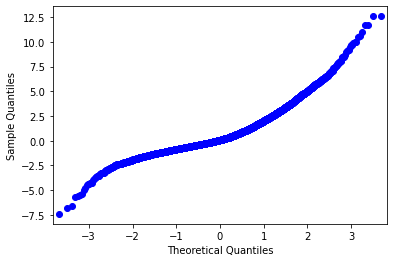

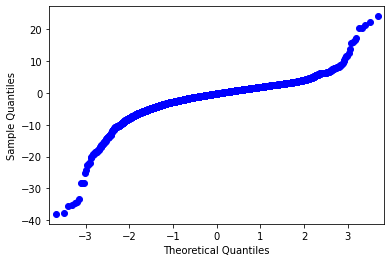

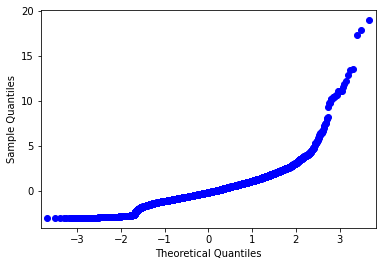

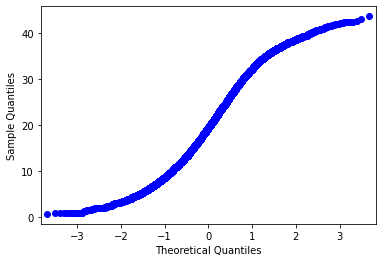

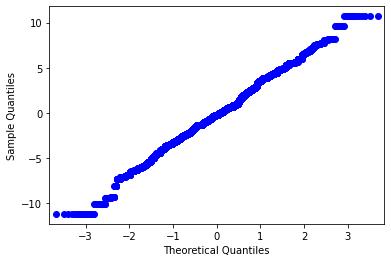

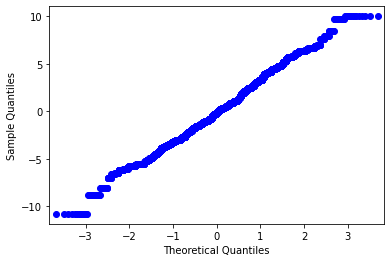

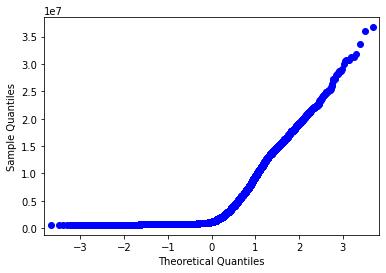

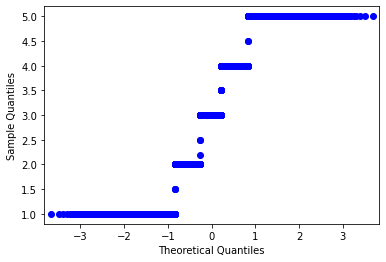

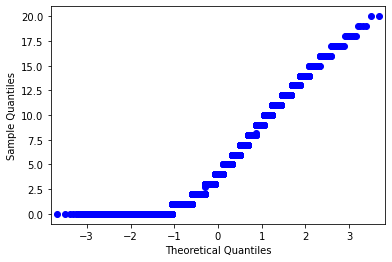

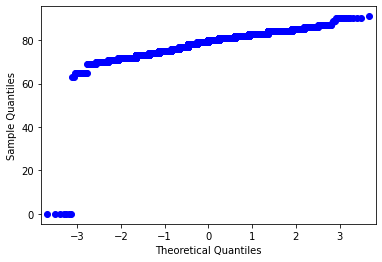

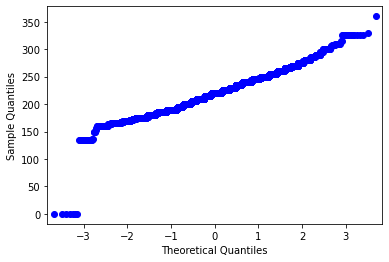

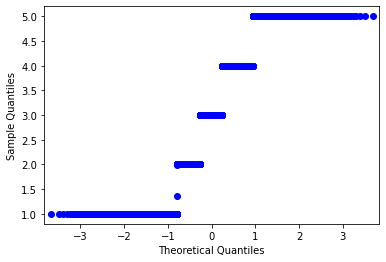

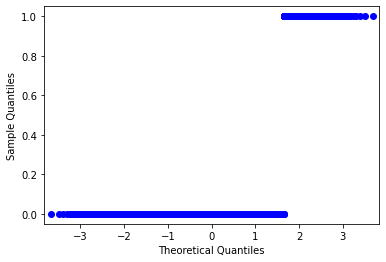

In [4]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

for col in dataset.columns:
    qqplot(dataset[col])
    #stat, p = shapiro(dataset[col])
    #print(col)
    #print('Statistics=%.3f, p=%.3e' % (stat, p))
    # interpret
    #alpha = 0.05
    #if p > alpha:
        #print('Sample looks Gaussian (fail to reject H0)')
    #else:
        #print('Sample does not look Gaussian (reject H0)')

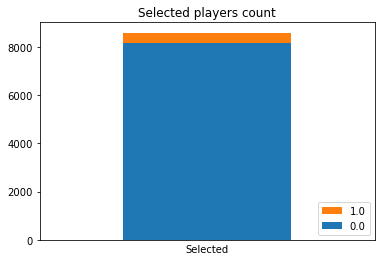

In [27]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
dataset.assign(dummy = 1).groupby(
  ['dummy','Selected']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Selected players count')

# other it'll show up as 'dummy' 
plt.xlabel('Selected')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(dataset['Selected'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

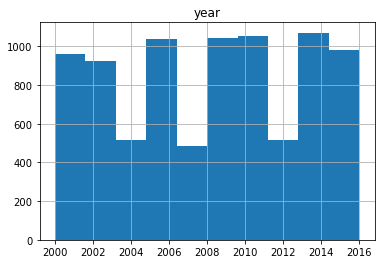

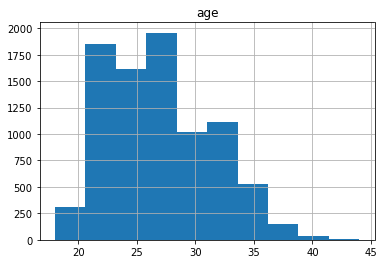

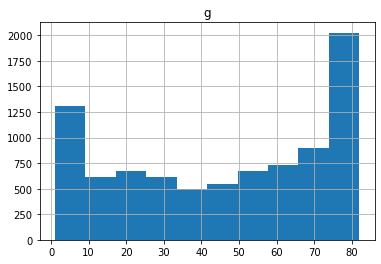

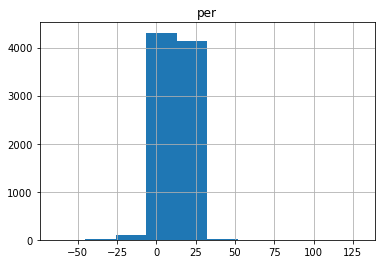

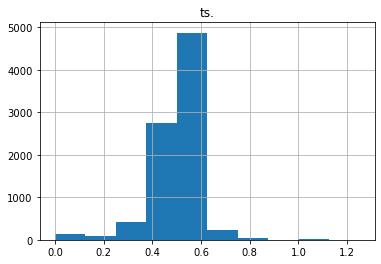

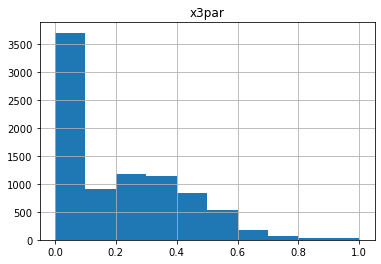

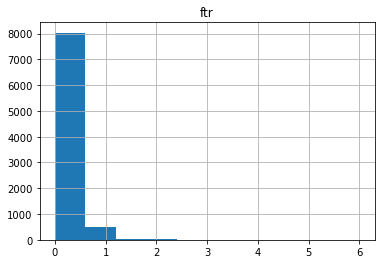

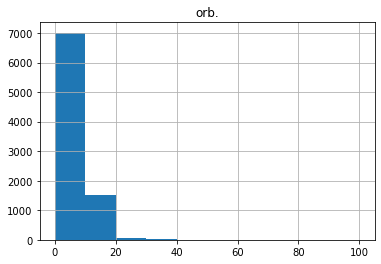

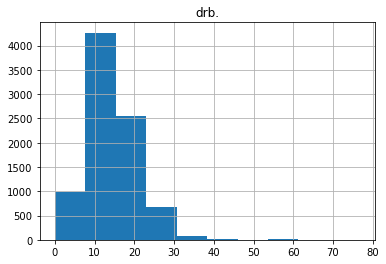

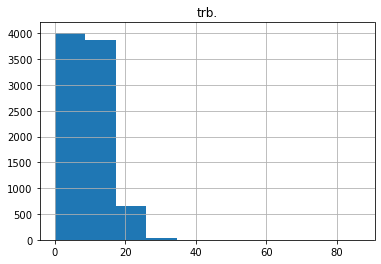

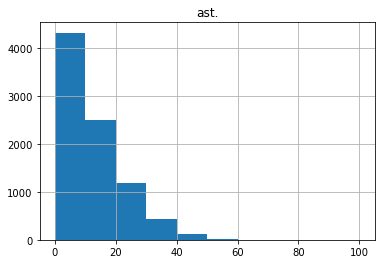

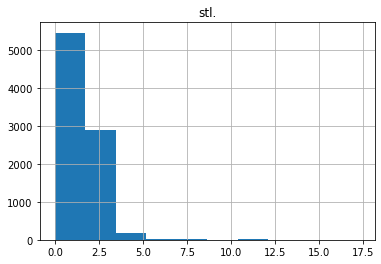

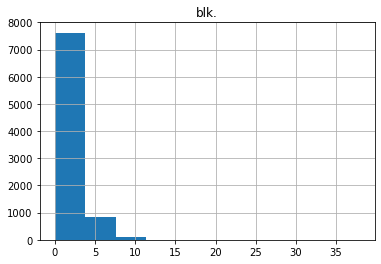

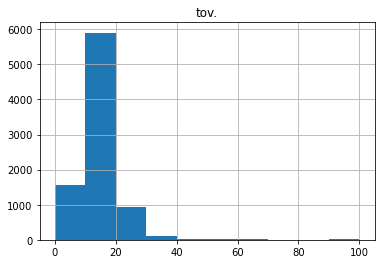

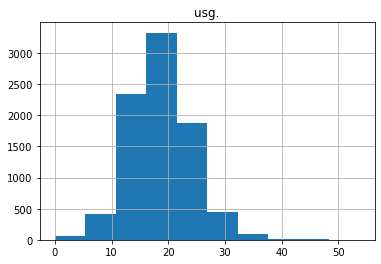

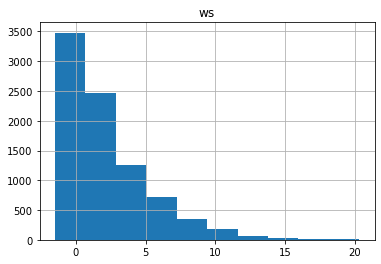

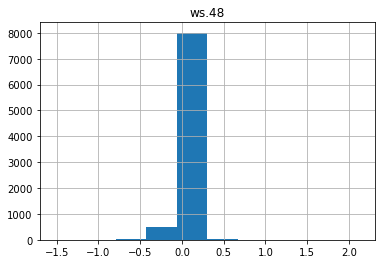

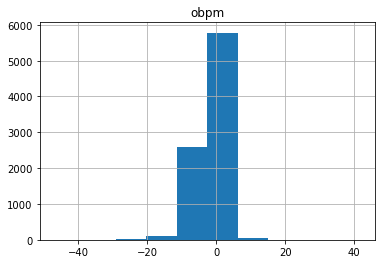

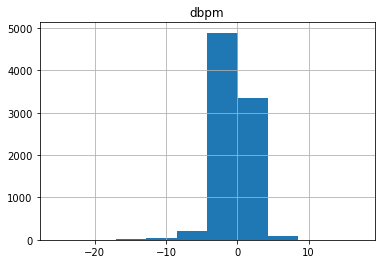

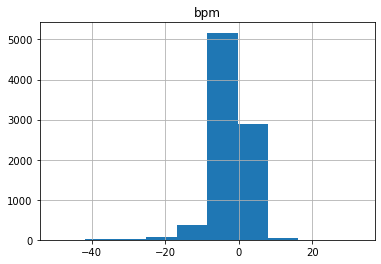

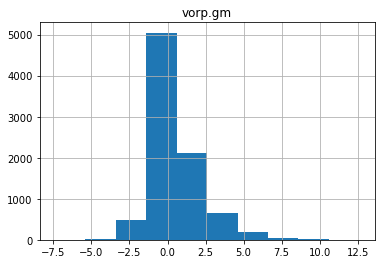

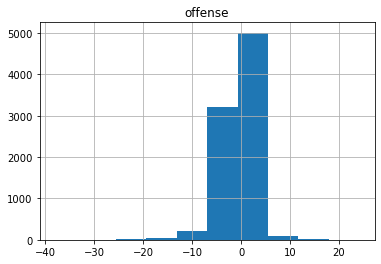

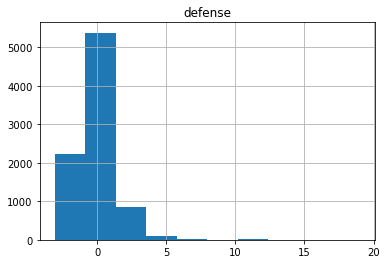

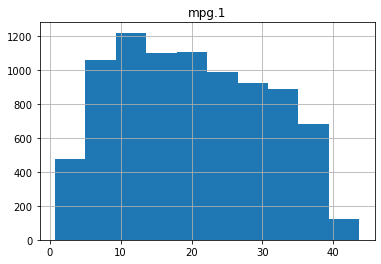

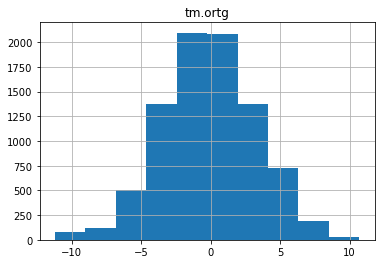

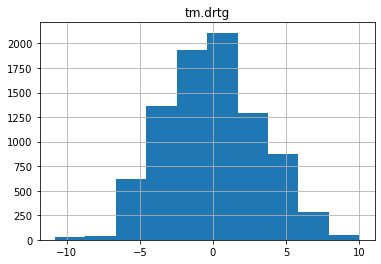

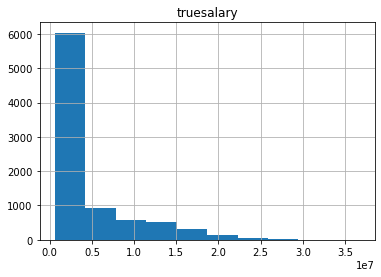

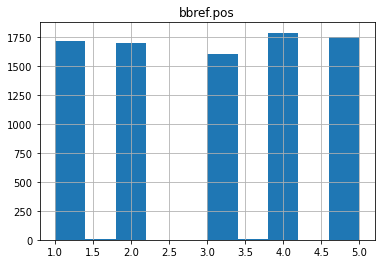

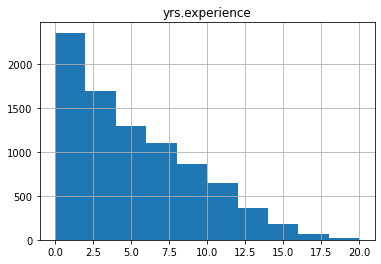

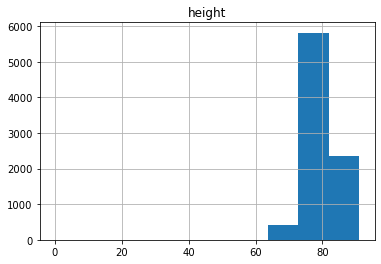

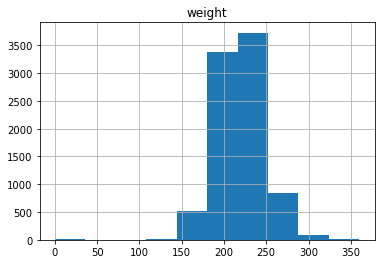

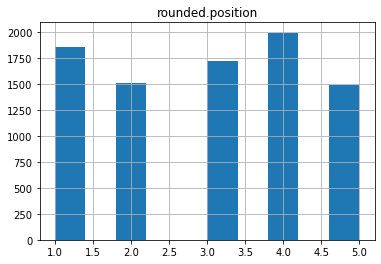

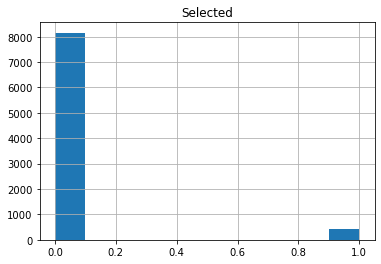

In [50]:
num_bins = 50

for i in dataset.columns:
    dataset[[i]].hist()

In [25]:
dataset.sort_values('truesalary', ascending=False).drop_duplicates(['player'])


,tm,player,year,age,g,per,ts.,x3par,ftr,orb.,...,mpg.1,tm.ortg,tm.drtg,truesalary,bbref.pos,yrs.experience,height,weight,rounded.position,Selected
4456,CLE,LeBron James,2009.0,24.0,81.0,31.7,0.591,2.380000e-01,0.472,4.3,...,37.7,4.2,5.6,36700000.0,3.0,5.0,80.0,240.0,3.0,1.0
4461,NOH,Chris Paul,2009.0,23.0,78.0,30.0,0.599,1.400000e-01,0.418,2.8,...,38.5,0.6,0.9,31900000.0,1.0,3.0,72.0,175.0,1.0,1.0
6,LAL,Shaquille O'Neal,2000.0,27.0,79.0,30.6,0.578,1.000000e-03,0.495,11.5,...,40.0,2.9,6.1,30800000.0,5.0,7.0,85.0,325.0,5.0,0.0
4458,MIA,Dwyane Wade,2009.0,27.0,79.0,30.4,0.574,1.600000e-01,0.443,3.5,...,38.6,-0.4,0.8,30700000.0,2.0,5.0,76.0,212.0,1.0,1.0
1886,MIN,Kevin Garnett,2004.0,27.0,82.0,29.4,0.547,2.700000e-02,0.289,9.1,...,39.4,2.7,4.0,30700000.0,4.0,8.0,83.0,220.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,VAN,Dennis Scott,2000.0,31.0,66.0,9.4,0.515,5.680000e-01,0.171,1.5,...,19.1,-1.1,-4.5,600000.0,3.0,9.0,80.0,229.0,3.0,0.0
360,LAL,John Salley,2000.0,35.0,45.0,8.3,0.437,-2.775558e-17,0.406,7.2,...,6.7,2.9,6.1,600000.0,5.0,10.0,83.0,230.0,4.0,0.0
310,CHI,Dedric Willoughby,2000.0,25.0,25.0,12.2,0.472,5.470000e-01,0.285,2.5,...,20.3,-9.4,-0.8,600000.0,1.0,0.0,75.0,180.0,1.0,0.0
5338,SAS,Malik Hairston,2010.0,22.0,47.0,11.6,0.555,1.450000e-01,0.395,4.9,...,6.7,2.1,3.3,600000.0,2.0,1.0,78.0,220.0,3.0,0.0
